In [16]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Import data
dataset = pd.read_csv("C:/DATA/Course/CISC 684/train.csv", names=['Store','Dept','Date','weeklySales','isHoliday'],sep=',', header=0)
features = pd.read_csv("C:/DATA/Course/CISC 684/features.csv",sep=',', header=0,
                       names=['Store','Date','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4',
                              'MarkDown5','CPI','Unemployment','IsHoliday']).drop(columns=['IsHoliday'])
stores = pd.read_csv("C:/DATA/Course/CISC 684/stores.csv", names=['Store','Type','Size'],sep=',', header=0)
train_dataset = dataset.merge(stores, how='left').merge(features, how='left')

train_dataset.head(5)

train_dataset.Date = pd.to_datetime(train_dataset.Date)
train_dataset['Week'] = train_dataset.Date.dt.isocalendar().week 
train_dataset['Year'] = train_dataset.Date.dt.isocalendar().year
pd.DataFrame(train_dataset.dtypes, columns=['Type'])

,Type
Store,int64
Dept,int64
Date,datetime64[ns]
weeklySales,float64
isHoliday,bool
Type,object
Size,int64
Temperature,float64
Fuel_Price,float64
MarkDown1,float64


weeklySales    float64
dtype: object
(48, 1)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

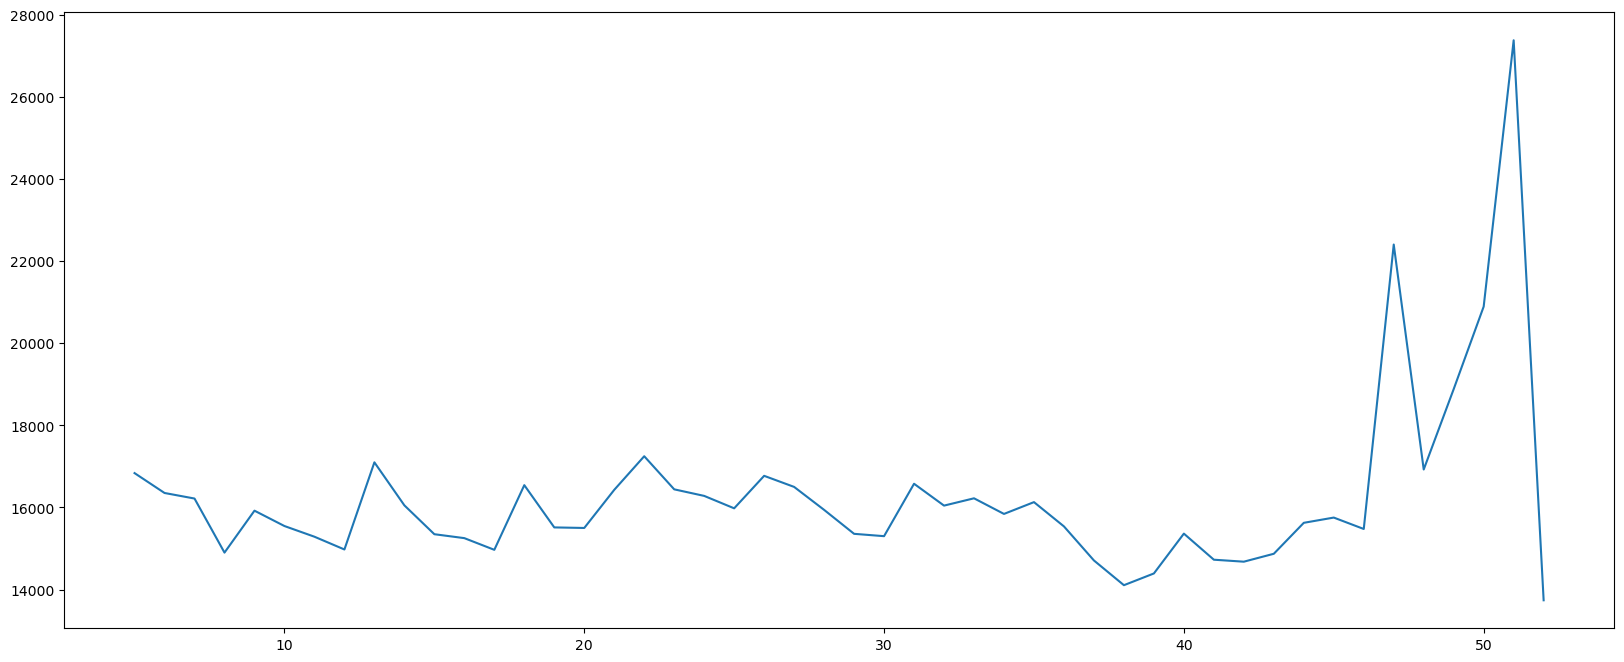

In [47]:
# Descriptive Analysis
weekly_sales_2010 = train_dataset[train_dataset.Year==2010][['Week','weeklySales']].groupby(['Week']).mean()
weekly_sales_2011 = train_dataset[train_dataset.Year==2011][['Week','weeklySales']].groupby(['Week']).mean()
weekly_sales_2012 = train_dataset[train_dataset.Year==2012][['Week','weeklySales']].groupby(['Week']).mean()
weekly_sales_2013 = train_dataset[train_dataset.Year==2013][['Week','weeklySales']].groupby(['Week']).mean()
#weekly_sales_2010.columns = ['Week', 'weeklySales']
#print(weekly_sales_2010)
print(weekly_sales_2010.dtypes)
print(weekly_sales_2010.shape)

plt.figure(figsize=(20,8))
sns.lineplot(data=weekly_sales_2010, x='Week',y='weeklySales')
sns.lineplot(data=weekly_sales_2011, x='Week',y='weeklySales')
sns.lineplot(data=weekly_sales_2012, x='Week',y='weeklySales')
sns.lineplot(data=weekly_sales_2013, x='Week',y='weeklySales')
plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012','2013'], loc='best', fontsize=16)
plt.title('Average Weekly Sales - Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

'''






'''

<Axes: xlabel='Week'>

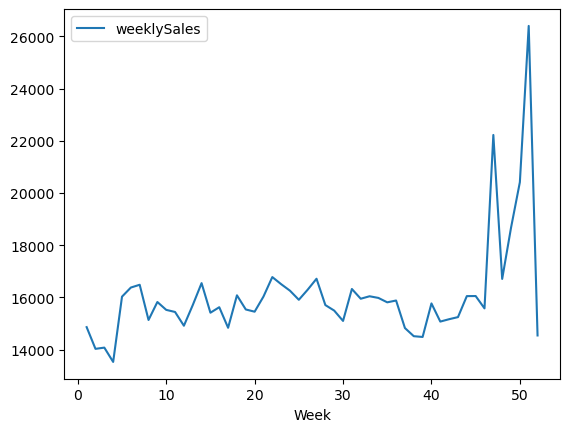

In [50]:
train_dataset.groupby(['Week'])['weeklySales'].mean().plot(legend=True)